In [1]:
%matplotlib inline

/var/folders/wj/fvbz5h9j6bq3_282kzrgq4j40000gn/T/ipykernel_44365/3730685724.py:3: RuntimeWarning: Setting non-standard config type: "MNE_BROWSE_BACKEND"
  mne.set_config('MNE_BROWSE_BACKEND', 'matplotlib')


Creating RawArray with float64 data, n_channels=25, n_times=96735
    Range : 0 ... 96734 =      0.000 ...   386.936 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 22 components
Computing Extended Infomax ICA


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 10.9s.


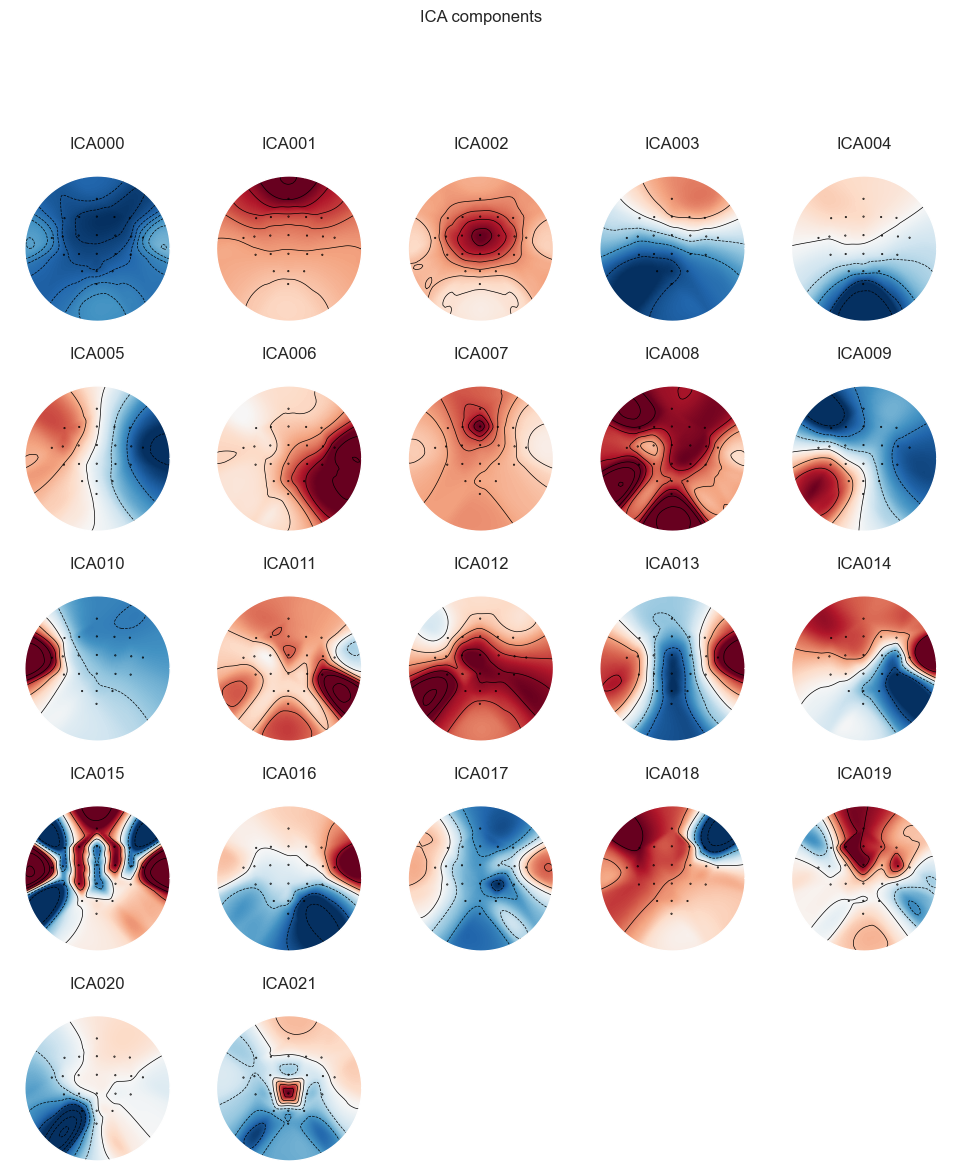

Applying ICA to Raw instance
    Transforming to ICA space (22 components)
    Zeroing out 1 ICA component
    Projecting back using 22 PCA components


<RawArray | 25 x 96735 (386.9 s), ~18.5 MB, data loaded>

In [2]:
from scipy.io import loadmat
import mne
mne.set_config('MNE_BROWSE_BACKEND', 'matplotlib')
    


mat = loadmat("A01T.mat",simplify_cells=True)
eeg = mat["data"][3]["X"] * 1e-6 # convert to volts


ch_names = ["Fz", "FC3", "FC1", "FCz", "FC2", "FC4", "C5", "C3", "C1",
"Cz","C2", "C4", "C6", "CP3", "CP1", "CPz", "CP2", "CP4", "P1", "Pz", "P2",
"POz", "EOG1", "EOG2", "EOG3"]

info = mne.create_info(ch_names, 250, ch_types=["eeg"] * 22 +
["eog"] * 3)

raw = mne.io.RawArray(eeg.T, info)

raw.set_montage("standard_1020")

# Settuping ICA


raw_tmp = raw.copy()
raw_tmp.filter(l_freq=1, h_freq=None)
ica = mne.preprocessing.ICA(method="infomax", fit_params={"extended": True}, random_state=1)
ica.fit(raw_tmp)
ica.plot_components(inst=raw_tmp, picks=range(22))
ica.exclude = [1]
raw_corrected = raw.copy()
ica.apply(raw_corrected)


Using matplotlib as 2D backend.


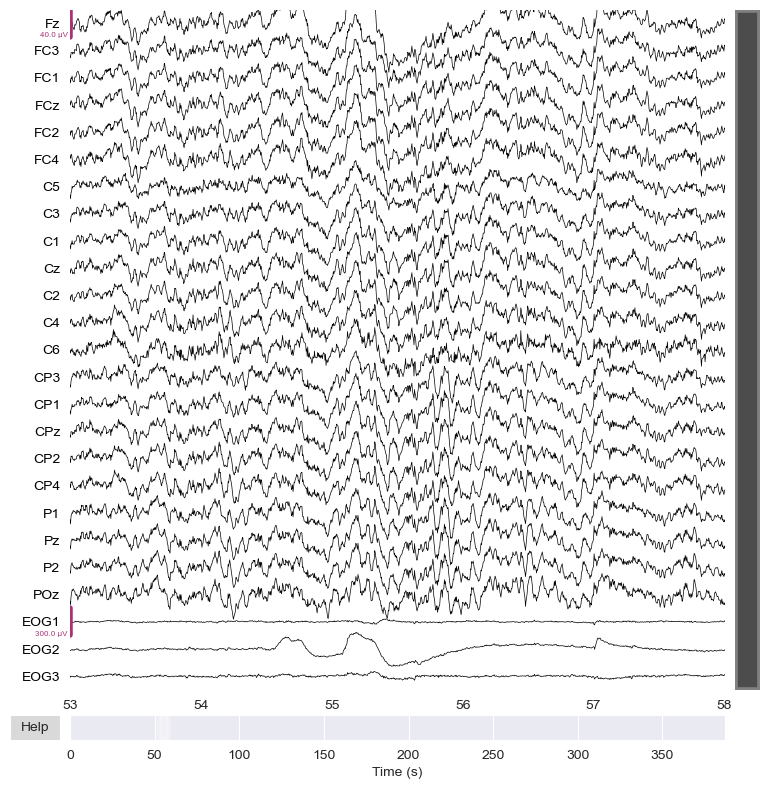

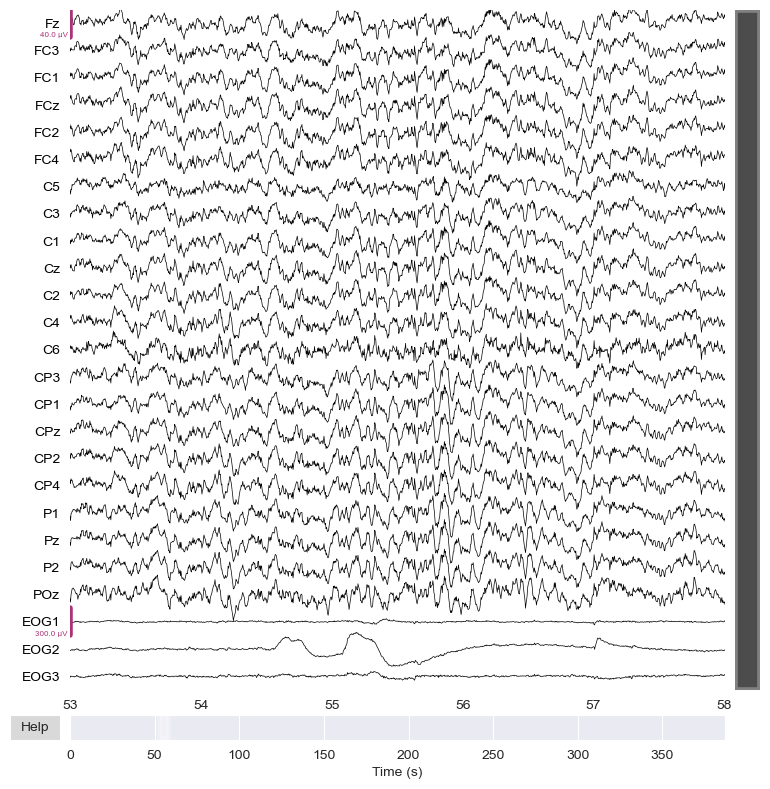

In [3]:
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot(n_channels=25, start=53, duration=5, title="Before")
    raw_corrected.plot(n_channels=25, start=53, duration=5, title="After")


25
[0.00e+00 9.00e-05 1.80e-04 2.70e-04 3.60e-04 4.50e-04 5.40e-04 6.30e-04
 7.20e-04 8.10e-04 9.00e-04 9.90e-04 1.08e-03 1.17e-03 1.26e-03 1.35e-03
 1.44e-03 1.53e-03 1.62e-03 1.71e-03 1.80e-03 1.89e-03 1.98e-03 2.07e-03
 2.16e-03]


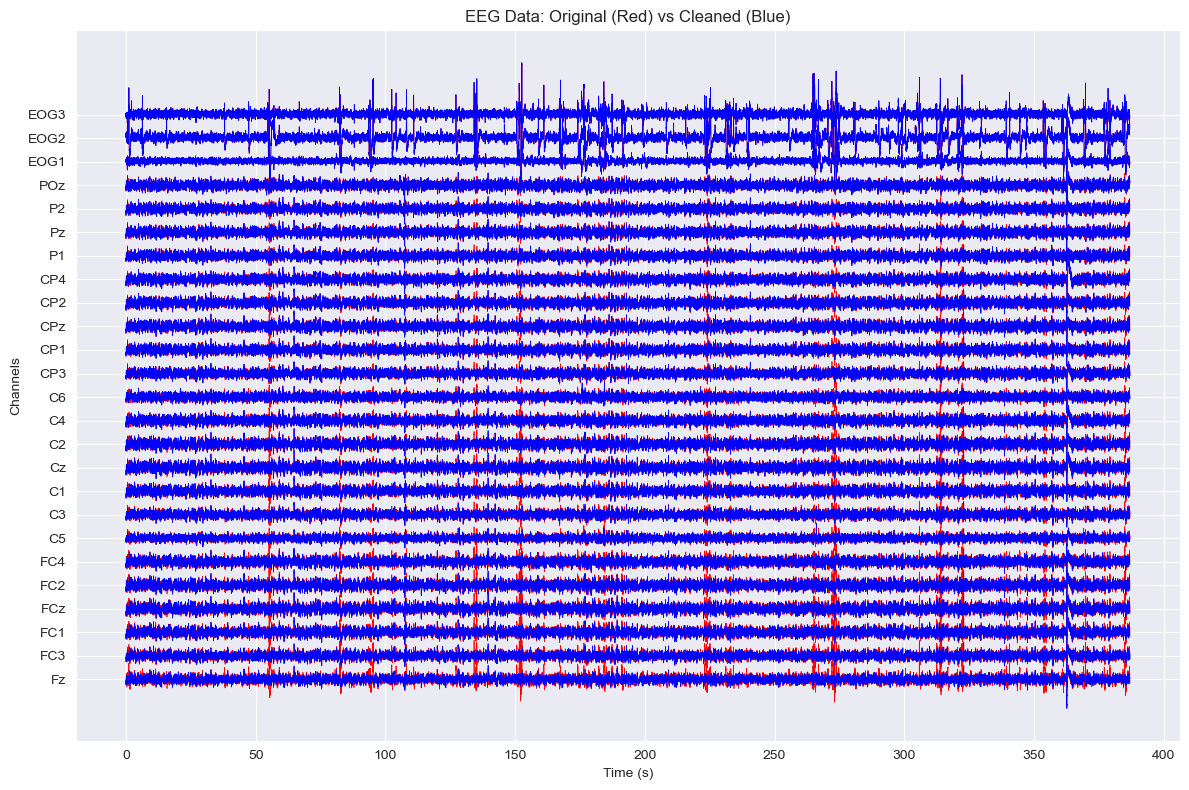

In [5]:
from matplotlib import pyplot as plt
import numpy as np
# Offset for each channel for clarity
print(raw._data.shape[0])
offsets = np.arange(raw._data.shape[0]) * 0.00009  # Adjust the scalar for a suitable vertical spacing

print(offsets)
plt.figure(figsize=(12, 8))

# Plot original data in red and cleaned data in blue
for i, (ch_data, ch_data_cleaned) in enumerate(zip(raw._data, raw_corrected._data)):
    plt.plot(raw.times, ch_data + offsets[i], color='red', lw=0.5)
    plt.plot(raw.times, ch_data_cleaned + offsets[i], color='blue', lw=0.5)

plt.yticks(offsets, raw.ch_names)
plt.xlabel('Time (s)')
plt.ylabel('Channels')
plt.title('EEG Data: Original (Red) vs Cleaned (Blue)')
plt.tight_layout()
plt.show()